In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


This notebook aim to make use of the kaggle dataset to classificate alzheimer disease devlopment. 

It is supported by two repositories that i found on the internet :


> https://github.com/ShaileshDhama/Alzheimer-Detection-and-Classification/blob/master/alzheimer-detection-and-classification.ipynb
> https://www.kaggle.com/borellirajaswanik/alzheimer-s-disease-classification-notebook



# IMPORT

In [2]:
import random,math,copy,time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import (RandomForestClassifier,GradientBoostingClassifier)
from sklearn import tree
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,cross_val_score
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from tqdm import tqdm
import time
from sklearn.model_selection import GridSearchCV

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

import os
from distutils.dir_util import copy_tree, remove_tree

from PIL import Image
from random import randint

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef as MCC
from sklearn.metrics import balanced_accuracy_score as BAS
from sklearn.metrics import classification_report, confusion_matrix


from tensorflow.keras.preprocessing.image import ImageDataGenerator as IDG

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [4]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator as IDG
import os
from distutils.dir_util import copy_tree, remove_tree
from sklearn.model_selection import train_test_split,cross_val_score
import random,math,copy,time


In [5]:
import matplotlib.pyplot as plt
import random,math,copy,time
from random import randint
from imblearn.over_sampling import SMOTE

# Data

In [6]:
base_dir = "/content/gdrive/MyDrive/UPM_ALUMNOS_2021/BNIL/Alzheimer_s Dataset/"
root_dir = "./"
test_dir = base_dir + "test/"
train_dir = base_dir + "train/"
work_dir = root_dir + "dataset/"

if os.path.exists(work_dir):
    remove_tree(work_dir)
    

os.mkdir(work_dir)
copy_tree(train_dir, work_dir)
copy_tree(test_dir, work_dir)
print("Working Directory Contents:", os.listdir(work_dir))

Working Directory Contents: ['MildDemented', 'NonDemented', 'ModerateDemented', 'VeryMildDemented']


In [7]:
WORK_DIR = './dataset/'

CLASSES = [ 'NonDemented',
            'VeryMildDemented',
            'MildDemented',
            'ModerateDemented']

IMG_SIZE = 176
IMAGE_SIZE = [176, 176]
DIM = (IMG_SIZE, IMG_SIZE)

In [8]:
#Performing Image Augmentation to have more data samples

ZOOM = [.99, 1.01]
BRIGHT_RANGE = [0.8, 1.2]
HORZ_FLIP = True
FILL_MODE = "constant"
DATA_FORMAT = "channels_last"

work_dr = IDG(rescale = 1./255, brightness_range=BRIGHT_RANGE, zoom_range=ZOOM, data_format=DATA_FORMAT, fill_mode=FILL_MODE, horizontal_flip=HORZ_FLIP)

train_data_gen = work_dr.flow_from_directory(directory=WORK_DIR, target_size=DIM, batch_size=6300, shuffle=False,color_mode= 'grayscale')

Found 6400 images belonging to 4 classes.


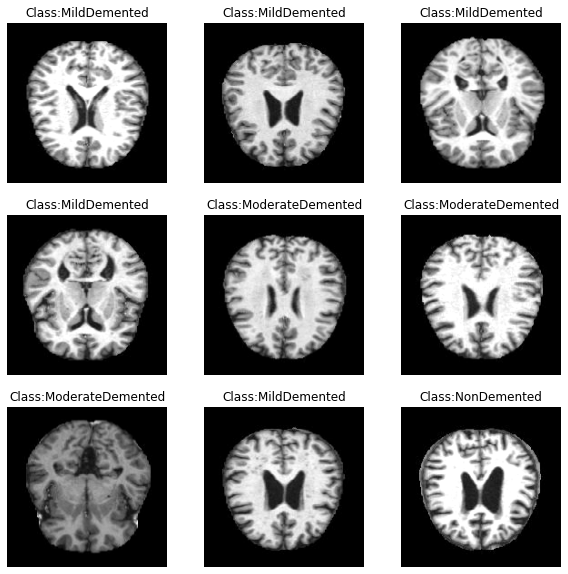

In [ ]:
def show_images(generator,y_pred=None):
    """
    Input: An image generator,predicted labels (optional)
    Output: Displays a grid of 9 images with lables
    """
    ####
    # get image labeles
    labels =dict(zip([0,1,2,3], CLASSES))
    
    # get a batch of images
    x,y = generator.next()
    
    # display a grid of 9 images
    plt.figure(figsize=(10, 10))
    if y_pred is None:
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            idx = randint(0, 6000)
            
            plt.imshow( tf.squeeze(x[idx]),cmap='gray' )
            plt.axis("off")
            plt.title("Class:{}".format(labels[np.argmax(y[idx])]))
                                                     
    else:
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(x[i])
            plt.axis("off")
            plt.title("Actual:{} \nPredicted:{}".format(labels[np.argmax(y[i])],labels[y_pred[i]]))
    
# Display Train Images
show_images(train_data_gen)

In [9]:
#Retrieving the data from the ImageDataGenerator iterator
train_data, train_labels = train_data_gen.next()

In [10]:
#Getting to know the dimensions of our dataset
print(train_data.shape, train_labels.shape)

(6300, 176, 176, 1) (6300, 4)


In [ ]:
#Splitting the data into train, test, and validation sets
train_data, test_data, train_labels, test_labels = train_test_split(train_data, train_labels, test_size = 0.2, random_state=42)

In [ ]:
print(train_data.shape, train_labels.shape)
print(test_data.shape, test_labels.shape)

(5040, 176, 176, 1) (5040, 4)
(1260, 176, 176, 1) (1260, 4)


In [ ]:
d1, d2, d3,d4 = train_data.shape
x_data_reshaped = train_data.reshape((d1, d2*d3))
print(x_data_reshaped.shape)
x_train= pd.DataFrame(x_data_reshaped)
x_train

y_df = pd.DataFrame(train_labels,
                   columns=[ 'NonDemented',
            'VeryMildDemented',
            'MildDemented',
            'ModerateDemented'])


all = pd.concat([y_df, x_train], axis=1)

all = all.loc[(all['NonDemented']==1) | (all['ModerateDemented']==1)]




(5040, 30976)


In [ ]:
all = all.reset_index(drop=True)
all

,NonDemented,VeryMildDemented,MildDemented,ModerateDemented,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,...,30936,30937,30938,30939,30940,30941,30942,30943,30944,30945,30946,30947,30948,30949,30950,30951,30952,30953,30954,30955,30956,30957,30958,30959,30960,30961,30962,30963,30964,30965,30966,30967,30968,30969,30970,30971,30972,30973,30974,30975
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2405,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2406,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2407,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2408,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y_train=all['ModerateDemented']
y_train

0       0.0
1       1.0
2       0.0
3       0.0
4       1.0
       ... 
2405    1.0
2406    1.0
2407    1.0
2408    1.0
2409    0.0
Name: ModerateDemented, Length: 2410, dtype: float32

In [ ]:
y_train.value_counts()

1.0    1709
0.0     701
Name: ModerateDemented, dtype: int64

# As we can see our data is unbalanced for the application we would like to perform.


> We need to find a way to balance the dataset ! 



In [11]:
#Performing over-sampling of the data, since the classes are imbalanced
####
sm = SMOTE(random_state=42)

train_data, train_labels = sm.fit_resample(train_data.reshape(-1, IMG_SIZE * IMG_SIZE ), train_labels)

train_data = train_data.reshape(-1, IMG_SIZE, IMG_SIZE)

print(train_data.shape, train_labels.shape)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


(12800, 176, 176) (12800, 4)


In [12]:
#Splitting the data into train, test, and validation sets

train_data, test_data, train_labels, test_labels = train_test_split(train_data, train_labels, test_size = 0.2, random_state=42)


In [13]:

print(train_data.shape, train_labels.shape)
print(test_data.shape, test_labels.shape)



(10240, 176, 176) (10240, 4)
(2560, 176, 176) (2560, 4)


In [14]:
d1, d2, d3 = train_data.shape
x_data_reshaped = train_data.reshape((d1, d2*d3))
print(x_data_reshaped.shape)
x_train= pd.DataFrame(x_data_reshaped)
x_train

y_df = pd.DataFrame(train_labels,
                   columns=[ 'NonDemented',
            'VeryMildDemented',
            'MildDemented',
            'ModerateDemented'])


all = pd.concat([y_df, x_train], axis=1)

all = all.loc[(all['NonDemented']==1) | (all['ModerateDemented']==1)]




(10240, 30976)


In [15]:
all = all.reset_index(drop=True)
all

,NonDemented,VeryMildDemented,MildDemented,ModerateDemented,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,...,30936,30937,30938,30939,30940,30941,30942,30943,30944,30945,30946,30947,30948,30949,30950,30951,30952,30953,30954,30955,30956,30957,30958,30959,30960,30961,30962,30963,30964,30965,30966,30967,30968,30969,30970,30971,30972,30973,30974,30975
0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5126,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5127,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5128,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5129,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
y_train=all['ModerateDemented']
y_train

0       1
1       1
2       1
3       0
4       1
       ..
5126    1
5127    1
5128    1
5129    0
5130    0
Name: ModerateDemented, Length: 5131, dtype: int64

In [17]:
x_train=all[all.columns[5:]]
x_train

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,30936,30937,30938,30939,30940,30941,30942,30943,30944,30945,30946,30947,30948,30949,30950,30951,30952,30953,30954,30955,30956,30957,30958,30959,30960,30961,30962,30963,30964,30965,30966,30967,30968,30969,30970,30971,30972,30973,30974,30975
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5126,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5127,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5128,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5129,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
features=(x_train.columns)


In [19]:
d=30975# Flock (population) size
lt=30975


In [20]:
d1, d2, d3 = test_data.shape
x_data_reshaped = test_data.reshape((d1, d2*d3))
print(x_data_reshaped.shape)
x_test= pd.DataFrame(x_data_reshaped)
x_test

y_df = pd.DataFrame(test_labels,
                   columns=[ 'NonDemented',
            'VeryMildDemented',
            'MildDemented',
            'ModerateDemented'])


all = pd.concat([y_df, x_test], axis=1)

all = all.loc[(all['NonDemented']==1) | (all['ModerateDemented']==1)]

all = all.reset_index(drop=True)
all

y_test=all['ModerateDemented']
y_test

x_test=all[all.columns[5:]]
x_test

(2560, 30976)


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,30936,30937,30938,30939,30940,30941,30942,30943,30944,30945,30946,30947,30948,30949,30950,30951,30952,30953,30954,30955,30956,30957,30958,30959,30960,30961,30962,30963,30964,30965,30966,30967,30968,30969,30970,30971,30972,30973,30974,30975
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1264,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1265,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1266,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
import datetime

In [28]:

print(datetime.datetime.now())

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train, y_train)
neigh.predict(x_test)
nacc=neigh.score(x_test,y_test)

print(datetime.datetime.now())

#
rforest = RandomForestClassifier(n_estimators=500)
rforest.fit(x_train, y_train)
rforest.predict(x_test)
rfacc=rforest.score(x_test,y_test)

print(datetime.datetime.now())
#
dtree = tree.DecisionTreeClassifier(max_depth=30, min_samples_split=20)
dtree.fit(x_train, y_train)
dtree.predict(x_test)
dtacc=dtree.score(x_test,y_test)

print(datetime.datetime.now())

clf = svm.SVC()
clf.fit(x_train, y_train)
clf.predict(x_test)
clf=clf.score(x_test,y_test)

print(datetime.datetime.now())

print (nacc, rfacc, dtacc, clf)


2021-06-10 16:58:42.188938
2021-06-10 17:11:59.242770
2021-06-10 17:15:54.977150
2021-06-10 17:18:11.963423
2021-06-10 17:41:45.631359
0.9598108747044918 0.9826635145784082 0.8274231678486997 0.9156816390858944


In [29]:
im=(rforest.feature_importances_)
print(im)
print(im.shape,type(im))

[0. 0. 0. ... 0. 0. 0.]
(30975,) <class 'numpy.ndarray'>


In [30]:
im_df=pd.DataFrame(im)


In [31]:
im_df.to_csv('importance.csv')

In [32]:
len(im)

30975

In [33]:
features

Index([    1,     2,     3,     4,     5,     6,     7,     8,     9,    10,
       ...
       30966, 30967, 30968, 30969, 30970, 30971, 30972, 30973, 30974, 30975],
      dtype='object', length=30975)

In [34]:
imo=pd.Series()
#imo["a"]= features
imo = pd.Series(im)
#for i in tqdm(range(d)):
#    imo= imo.set_value(features[i],im[i])
len(imo)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


30975

In [35]:
imo.to_csv('importance_feature.csv',header=['importance'])
imo

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
30970    0.0
30971    0.0
30972    0.0
30973    0.0
30974    0.0
Length: 30975, dtype: float64

In [36]:
m=20  # Problem dimension (number of decision variables
Ap=0.1  # Awareness probability
fl=2   # Flight length (fl)
wf=1.2# wf is used to control the importance of classification accuracy and number of selected features.

In [37]:
def init():   #initialization function
    df2=pd.DataFrame(np.ones((m,d),dtype='int'),columns=features)
    return df2
df2=init()
df2

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,30936,30937,30938,30939,30940,30941,30942,30943,30944,30945,30946,30947,30948,30949,30950,30951,30952,30953,30954,30955,30956,30957,30958,30959,30960,30961,30962,30963,30964,30965,30966,30967,30968,30969,30970,30971,30972,30973,30974,30975
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
6,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
7,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
8,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
9,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [38]:
# this defines the fitness of each crow by calculating their accuracy and no features selected using the below formula
def fitness(df2):      # fitness function whose 1 parameter takes the crows and their position as input
    fnt=np.zeros((m,1))  # fnt is the fitness function
    for k in tqdm(range(m)):    
        global sel
        sel=[]
        q=0
        imp=0
        a=(df2.iloc[k,:])==0.0
        if a.all()==True:
            df2.iloc[k,:]=1.0
        for p in list(features[:30974]):
            if df2.loc[k,p]==1.0:
                sel.insert(q,p)
                temp=imo[p]
                imp=imp+temp
            q=q+1
        lf=len(sel)
        divide=lf/lt
        fnt[k]=imp+wf*(1-float(lf/lt))     # fitness formula
    return fnt


In [39]:
imo[list(features)[0]]

0.0

In [40]:
z=init()   #crow memory with initial position
tmax=50   # Maximum number of iterations (itermax)
xn=z.copy()  # the position of the crow
mem=init()  # memory is initialized using the init function
xnew=(xn).copy()   # the positions of the crow
ft=fitness(xn)
plotit=[]

100%|██████████| 20/20 [00:12<00:00,  1.59it/s]


In [51]:
tottime=0
# it is a formula to convert positions of each crow into 0 and 1 
for t in range(tmax):
    print(t)# no of iterations
    time1=time.time()
   
    xnew_list = []
    plotit.append(ft.max())
    num = random.randint(0,m-1)  
   # Generation of random candidate crows for following (chasing)
    for i in tqdm(range(m)):   
       
        r=random.random()
        if r>=Ap:
            
            xnew_list.append((xn.loc[i,:]+fl*r*(mem.loc[num,:]-xn.loc[i,:])).tolist())# Generation of a new position for crow i (state 1)
            
        else:
            
            xnew_list.append((xnew.loc[i,:].apply(lambda lam:random.random())).tolist())   # Generation of a new position for crow i (state 2)
            
            
    xnew = pd.DataFrame(xnew_list)
    del xnew_list
    print('transpose')
    xnew= 1/( 1 + np.expm1(( 10*(xnew-0.5))))    #  formula to convert positions of each crow into 0 and 1
    print('exp')
    xnew=xnew.apply(lambda l:l>=random.random()).astype(int)
    print('apply lambda')
    xn=xnew.copy()     
    print('copied')
    # it is the updated binary position of each crow
    #feasibility test
    # this is done so that to check if atleast one position of the crow has value equal to 1. if it is not true then every
    # position value of the crow is made 1.
    for i in tqdm(range(m)):
        
        if ((xn.loc[i,:])==0.0).all()==True:
            xn.loc[i,:]=1.0
    
    print('running fitness')
    ft_new=fitness(xn).reshape(ft.shape)# here the accuracy of each crows are calculated.

    print('fitness done')
    for i in tqdm(range(m)):
         
        if ft_new[i]>ft[i]:
            ft[i]=ft_new[i]
            for j in features[:-1]:
                mem.loc[i,j]= xn.loc[i,j]
    
    print('complete'+str(t))
    time2=time.time()
    tottime=tottime+(time2-time1)
print(tottime/t+1)


 35%|███▌      | 7/20 [00:00<00:00, 61.00it/s]

0


100%|██████████| 20/20 [00:00<00:00, 59.36it/s]


transpose
exp


  0%|          | 0/20 [00:00<?, ?it/s]

apply lambda
copied
running fitness


  0%|          | 0/20 [00:00<?, ?it/s]

fitness done


 35%|███▌      | 7/20 [00:00<00:00, 65.67it/s]

complete0
1


100%|██████████| 20/20 [00:00<00:00, 61.85it/s]


transpose
exp


  0%|          | 0/20 [00:00<?, ?it/s]

apply lambda
copied
running fitness


  0%|          | 0/20 [00:00<?, ?it/s]

fitness done


 40%|████      | 8/20 [00:00<00:00, 70.31it/s]

complete1
2


100%|██████████| 20/20 [00:00<00:00, 64.78it/s]


transpose
exp


  0%|          | 0/20 [00:00<?, ?it/s]

apply lambda
copied
running fitness


 40%|████      | 8/20 [00:00<00:00, 70.97it/s]

fitness done
complete2
3


100%|██████████| 20/20 [00:00<00:00, 66.90it/s]


transpose
exp


  0%|          | 0/20 [00:00<?, ?it/s]

apply lambda
copied
running fitness


  0%|          | 0/20 [00:00<?, ?it/s]

fitness done


 40%|████      | 8/20 [00:00<00:00, 77.63it/s]

complete3
4


100%|██████████| 20/20 [00:00<00:00, 68.83it/s]


transpose
exp


  0%|          | 0/20 [00:00<?, ?it/s]

apply lambda
copied
running fitness


 40%|████      | 8/20 [00:00<00:00, 77.55it/s]

fitness done
complete4
5


100%|██████████| 20/20 [00:00<00:00, 71.38it/s]


transpose
exp


  0%|          | 0/20 [00:00<?, ?it/s]

apply lambda
copied
running fitness


 40%|████      | 8/20 [00:00<00:00, 73.38it/s]

fitness done
complete5
6


100%|██████████| 20/20 [00:00<00:00, 67.59it/s]


transpose
exp


  0%|          | 0/20 [00:00<?, ?it/s]

apply lambda
copied
running fitness


  0%|          | 0/20 [00:00<?, ?it/s]

fitness done


 40%|████      | 8/20 [00:00<00:00, 76.85it/s]

complete6
7


100%|██████████| 20/20 [00:00<00:00, 70.74it/s]


transpose
exp


  0%|          | 0/20 [00:00<?, ?it/s]

apply lambda
copied
running fitness


 35%|███▌      | 7/20 [00:00<00:00, 64.75it/s]

fitness done
complete7
8


100%|██████████| 20/20 [00:00<00:00, 66.53it/s]


transpose
exp


  0%|          | 0/20 [00:00<?, ?it/s]

apply lambda
copied
running fitness


 35%|███▌      | 7/20 [00:00<00:00, 68.82it/s]

fitness done
complete8
9


100%|██████████| 20/20 [00:00<00:00, 62.79it/s]


transpose
exp


  0%|          | 0/20 [00:00<?, ?it/s]

apply lambda
copied
running fitness


 40%|████      | 8/20 [00:00<00:00, 70.61it/s]

fitness done
complete9
10


100%|██████████| 20/20 [00:00<00:00, 67.02it/s]


transpose
exp


  0%|          | 0/20 [00:00<?, ?it/s]

apply lambda
copied
running fitness


 40%|████      | 8/20 [00:00<00:00, 74.73it/s]

fitness done
complete10
11


100%|██████████| 20/20 [00:00<00:00, 71.67it/s]


transpose
exp


  0%|          | 0/20 [00:00<?, ?it/s]

apply lambda
copied
running fitness


 35%|███▌      | 7/20 [00:00<00:00, 69.76it/s]

fitness done
complete11
12


100%|██████████| 20/20 [00:00<00:00, 66.67it/s]


transpose
exp


  0%|          | 0/20 [00:00<?, ?it/s]

apply lambda
copied
running fitness


 40%|████      | 8/20 [00:00<00:00, 72.99it/s]

fitness done
complete12
13


100%|██████████| 20/20 [00:00<00:00, 63.36it/s]


transpose
exp


  0%|          | 0/20 [00:00<?, ?it/s]

apply lambda
copied
running fitness


 35%|███▌      | 7/20 [00:00<00:00, 67.72it/s]

fitness done
complete13
14


100%|██████████| 20/20 [00:00<00:00, 65.46it/s]


transpose
exp


  0%|          | 0/20 [00:00<?, ?it/s]

apply lambda
copied
running fitness


 40%|████      | 8/20 [00:00<00:00, 71.35it/s]

fitness done
complete14
15


100%|██████████| 20/20 [00:00<00:00, 71.55it/s]


transpose
exp


  0%|          | 0/20 [00:00<?, ?it/s]

apply lambda
copied
running fitness


 40%|████      | 8/20 [00:00<00:00, 70.93it/s]

fitness done
complete15
16


100%|██████████| 20/20 [00:00<00:00, 68.08it/s]


transpose
exp


  0%|          | 0/20 [00:00<?, ?it/s]

apply lambda
copied
running fitness


 40%|████      | 8/20 [00:00<00:00, 70.60it/s]

fitness done
complete16
17


100%|██████████| 20/20 [00:00<00:00, 68.20it/s]


transpose
exp


  0%|          | 0/20 [00:00<?, ?it/s]

apply lambda
copied
running fitness


 40%|████      | 8/20 [00:00<00:00, 71.82it/s]

fitness done
complete17
18


100%|██████████| 20/20 [00:00<00:00, 67.80it/s]


transpose
exp


  0%|          | 0/20 [00:00<?, ?it/s]

apply lambda
copied
running fitness


 40%|████      | 8/20 [00:00<00:00, 75.82it/s]

fitness done
complete18
19


100%|██████████| 20/20 [00:00<00:00, 70.19it/s]


transpose
exp


  0%|          | 0/20 [00:00<?, ?it/s]

apply lambda
copied
running fitness


  0%|          | 0/20 [00:00<?, ?it/s]

fitness done


 35%|███▌      | 7/20 [00:00<00:00, 69.48it/s]

complete19
20


100%|██████████| 20/20 [00:00<00:00, 67.15it/s]


transpose
exp


  0%|          | 0/20 [00:00<?, ?it/s]

apply lambda
copied
running fitness


 40%|████      | 8/20 [00:00<00:00, 76.99it/s]

fitness done
complete20
21


100%|██████████| 20/20 [00:00<00:00, 70.65it/s]


transpose
exp


  0%|          | 0/20 [00:00<?, ?it/s]

apply lambda
copied
running fitness


 40%|████      | 8/20 [00:00<00:00, 75.17it/s]

fitness done
complete21
22


100%|██████████| 20/20 [00:00<00:00, 71.86it/s]


transpose
exp


  0%|          | 0/20 [00:00<?, ?it/s]

apply lambda
copied
running fitness


 40%|████      | 8/20 [00:00<00:00, 73.88it/s]

fitness done
complete22
23


100%|██████████| 20/20 [00:00<00:00, 71.62it/s]


transpose
exp


  0%|          | 0/20 [00:00<?, ?it/s]

apply lambda
copied
running fitness


 40%|████      | 8/20 [00:00<00:00, 71.95it/s]

fitness done
complete23
24


100%|██████████| 20/20 [00:00<00:00, 66.85it/s]


transpose
exp


  0%|          | 0/20 [00:00<?, ?it/s]

apply lambda
copied
running fitness


 35%|███▌      | 7/20 [00:00<00:00, 69.71it/s]

fitness done
complete24
25


100%|██████████| 20/20 [00:00<00:00, 67.35it/s]


transpose
exp


  0%|          | 0/20 [00:00<?, ?it/s]

apply lambda
copied
running fitness


 35%|███▌      | 7/20 [00:00<00:00, 67.02it/s]

fitness done
complete25
26


100%|██████████| 20/20 [00:00<00:00, 65.48it/s]


transpose
exp


  0%|          | 0/20 [00:00<?, ?it/s]

apply lambda
copied
running fitness


 35%|███▌      | 7/20 [00:00<00:00, 69.35it/s]

fitness done
complete26
27


100%|██████████| 20/20 [00:00<00:00, 66.56it/s]


transpose
exp


  0%|          | 0/20 [00:00<?, ?it/s]

apply lambda
copied
running fitness


  0%|          | 0/20 [00:00<?, ?it/s]

fitness done


 35%|███▌      | 7/20 [00:00<00:00, 67.16it/s]

complete27
28


100%|██████████| 20/20 [00:00<00:00, 67.96it/s]


transpose
exp


  0%|          | 0/20 [00:00<?, ?it/s]

apply lambda
copied
running fitness


 40%|████      | 8/20 [00:00<00:00, 70.72it/s]

fitness done
complete28
29


100%|██████████| 20/20 [00:00<00:00, 67.76it/s]


transpose
exp


  0%|          | 0/20 [00:00<?, ?it/s]

apply lambda
copied
running fitness


 35%|███▌      | 7/20 [00:00<00:00, 65.90it/s]

fitness done
complete29
30


100%|██████████| 20/20 [00:00<00:00, 62.25it/s]


transpose
exp


  0%|          | 0/20 [00:00<?, ?it/s]

apply lambda
copied
running fitness


 35%|███▌      | 7/20 [00:00<00:00, 62.35it/s]

fitness done
complete30
31


100%|██████████| 20/20 [00:00<00:00, 63.46it/s]


transpose
exp


  0%|          | 0/20 [00:00<?, ?it/s]

apply lambda
copied
running fitness


 40%|████      | 8/20 [00:00<00:00, 71.30it/s]

fitness done
complete31
32


100%|██████████| 20/20 [00:00<00:00, 67.82it/s]


transpose
exp


  0%|          | 0/20 [00:00<?, ?it/s]

apply lambda
copied
running fitness


 35%|███▌      | 7/20 [00:00<00:00, 65.70it/s]

fitness done
complete32
33


100%|██████████| 20/20 [00:00<00:00, 64.75it/s]


transpose
exp


  0%|          | 0/20 [00:00<?, ?it/s]

apply lambda
copied
running fitness


 35%|███▌      | 7/20 [00:00<00:00, 69.58it/s]

fitness done
complete33
34


100%|██████████| 20/20 [00:00<00:00, 67.47it/s]


transpose
exp


  0%|          | 0/20 [00:00<?, ?it/s]

apply lambda
copied
running fitness


 35%|███▌      | 7/20 [00:00<00:00, 69.57it/s]

fitness done
complete34
35


100%|██████████| 20/20 [00:00<00:00, 66.30it/s]


transpose
exp


  0%|          | 0/20 [00:00<?, ?it/s]

apply lambda
copied
running fitness


 35%|███▌      | 7/20 [00:00<00:00, 65.34it/s]

fitness done
complete35
36


100%|██████████| 20/20 [00:00<00:00, 66.02it/s]


transpose
exp


  0%|          | 0/20 [00:00<?, ?it/s]

apply lambda
copied
running fitness


 35%|███▌      | 7/20 [00:00<00:00, 68.36it/s]

fitness done
complete36
37


100%|██████████| 20/20 [00:00<00:00, 68.16it/s]


transpose
exp


  0%|          | 0/20 [00:00<?, ?it/s]

apply lambda
copied
running fitness


 35%|███▌      | 7/20 [00:00<00:00, 66.27it/s]

fitness done
complete37
38


100%|██████████| 20/20 [00:00<00:00, 65.94it/s]


transpose
exp


  0%|          | 0/20 [00:00<?, ?it/s]

apply lambda
copied
running fitness


 35%|███▌      | 7/20 [00:00<00:00, 66.91it/s]

fitness done
complete38
39


100%|██████████| 20/20 [00:00<00:00, 64.77it/s]


transpose
exp


  0%|          | 0/20 [00:00<?, ?it/s]

apply lambda
copied
running fitness


 40%|████      | 8/20 [00:00<00:00, 72.50it/s]

fitness done
complete39
40


100%|██████████| 20/20 [00:00<00:00, 68.15it/s]


transpose
exp


  0%|          | 0/20 [00:00<?, ?it/s]

apply lambda
copied
running fitness


 35%|███▌      | 7/20 [00:00<00:00, 66.75it/s]

fitness done
complete40
41


100%|██████████| 20/20 [00:00<00:00, 65.32it/s]


transpose
exp


  0%|          | 0/20 [00:00<?, ?it/s]

apply lambda
copied
running fitness


 35%|███▌      | 7/20 [00:00<00:00, 69.50it/s]

fitness done
complete41
42


100%|██████████| 20/20 [00:00<00:00, 67.32it/s]


transpose
exp


  0%|          | 0/20 [00:00<?, ?it/s]

apply lambda
copied
running fitness


 35%|███▌      | 7/20 [00:00<00:00, 69.32it/s]

fitness done
complete42
43


100%|██████████| 20/20 [00:00<00:00, 67.98it/s]


transpose
exp


  0%|          | 0/20 [00:00<?, ?it/s]

apply lambda
copied
running fitness


 35%|███▌      | 7/20 [00:00<00:00, 64.83it/s]

fitness done
complete43
44


100%|██████████| 20/20 [00:00<00:00, 62.65it/s]


transpose
exp


  0%|          | 0/20 [00:00<?, ?it/s]

apply lambda
copied
running fitness


 40%|████      | 8/20 [00:00<00:00, 70.10it/s]

fitness done
complete44
45


100%|██████████| 20/20 [00:00<00:00, 63.28it/s]


transpose
exp


  0%|          | 0/20 [00:00<?, ?it/s]

apply lambda
copied
running fitness


 35%|███▌      | 7/20 [00:00<00:00, 66.12it/s]

fitness done
complete45
46


100%|██████████| 20/20 [00:00<00:00, 64.99it/s]


transpose
exp


  0%|          | 0/20 [00:00<?, ?it/s]

apply lambda
copied
running fitness


 35%|███▌      | 7/20 [00:00<00:00, 66.20it/s]

fitness done
complete46
47


100%|██████████| 20/20 [00:00<00:00, 67.06it/s]


transpose
exp


  0%|          | 0/20 [00:00<?, ?it/s]

apply lambda
copied
running fitness


 35%|███▌      | 7/20 [00:00<00:00, 63.95it/s]

fitness done
complete47
48


100%|██████████| 20/20 [00:00<00:00, 62.29it/s]


transpose
exp


  0%|          | 0/20 [00:00<?, ?it/s]

apply lambda
copied
running fitness


 40%|████      | 8/20 [00:00<00:00, 73.45it/s]

fitness done
complete48
49


100%|██████████| 20/20 [00:00<00:00, 65.80it/s]


transpose
exp


  0%|          | 0/20 [00:00<?, ?it/s]

apply lambda
copied
running fitness


100%|██████████| 20/20 [00:00<00:00, 62883.12it/s]

fitness done
complete49
24.67296753124315


In [50]:
features[:-1]

Index([    1,     2,     3,     4,     5,     6,     7,     8,     9,    10,
       ...
       30965, 30966, 30967, 30968, 30969, 30970, 30971, 30972, 30973, 30974],
      dtype='object', length=30974)

In [53]:
# here the accuracy of each crows are calculated.
neigh2 = KNeighborsClassifier()
rforest2 =RandomForestClassifier()
dtree2 = tree.DecisionTreeClassifier()
clf2 = svm.SVC()

nacc2=np.zeros((m,1),dtype='float64')
rfacc2=np.zeros((m,1),dtype='float64')
dtacc2=np.zeros((m,1),dtype='float64')
clfacc2=np.zeros((m,1),dtype='float64')

q=0
for i in tqdm(range(m)):
    print(i)
    select=[]
    for p in list(features):
        if mem.loc[i,p]==1:
            select.insert(q,p)
            q=q+1
    neigh2.fit(x_train[select], y_train)
    neigh2.predict(x_test[select])
    nacc2[i]=neigh2.score(x_test[select],y_test) 
    #print(nacc2[i])
    
    rforest2.fit(x_train[select], y_train)
    rforest2.predict(x_test[select])
    rfacc2[i]=rforest2.score(x_test[select],y_test) 
    #print(rfacc2[i])
    
    dtree2.fit(x_train[select], y_train)
    dtree2.predict(x_test[select])
    dtacc2[i]=dtree2.score(x_test[select],y_test)
    #print(dtacc2[i])
    
    clf2.fit(x_train[select], y_train)
    clf2.predict(x_test[select])
    clfacc2[i]=clf2.score(x_test[select],y_test)
    #print(clfacc2[i])

print (nacc2.max(), rfacc2.max(), dtacc2.max(),clfacc2.max()) # the crow with maximum accuracy is printed

  0%|          | 0/20 [00:00<?, ?it/s]

0
[0.9393223]
[0.9535067]
[0.83136328]


  5%|▌         | 1/20 [00:24<07:49, 24.72s/it]

[0.78881009]
1
[0.59495666]
[0.62332545]
[0.62805359]


 10%|█         | 2/20 [00:27<05:26, 18.14s/it]

[0.51615445]
2
[0.92119779]
[0.95035461]
[0.79669031]


 15%|█▌        | 3/20 [00:52<05:42, 20.14s/it]

[0.77935382]
3
[0.6107171]
[0.69503546]
[0.62174941]


 20%|██        | 4/20 [00:55<04:01, 15.09s/it]

[0.53506698]
4
[0.61386919]
[0.62962963]
[0.6319937]


 25%|██▌       | 5/20 [00:58<02:50, 11.39s/it]

[0.51221434]
5
[0.64381403]
[0.68636722]
[0.61229314]


 30%|███       | 6/20 [01:01<02:04,  8.88s/it]

[0.52876281]
6
[0.93853428]
[0.96453901]
[0.84081954]


 35%|███▌      | 7/20 [03:27<10:51, 50.15s/it]

[0.88337273]
7
[0.91489362]
[0.93538219]
[0.81166273]


 40%|████      | 8/20 [03:42<07:52, 39.40s/it]

[0.75098503]
8
[0.60992908]
[0.61150512]
[0.60756501]


 45%|████▌     | 9/20 [03:45<05:12, 28.44s/it]

[0.52718676]
9
[0.61386919]
[0.6319937]
[0.6319937]


 50%|█████     | 10/20 [03:47<03:27, 20.75s/it]

[0.51221434]
10
[0.94326241]
[0.9535067]
[0.81875493]


 55%|█████▌    | 11/20 [04:12<03:16, 21.79s/it]

[0.77620173]
11
[0.92119779]
[0.94799054]
[0.79353822]


 60%|██████    | 12/20 [04:36<03:00, 22.57s/it]

[0.77462569]
12
[0.94562648]
[0.9535067]
[0.82190701]


 65%|██████▌   | 13/20 [05:09<03:00, 25.79s/it]

[0.79117415]
13
[0.59495666]
[0.62647754]
[0.62805359]


 70%|███████   | 14/20 [05:12<01:53, 18.89s/it]

[0.51615445]
14
[0.93853428]
[0.95193065]
[0.80851064]


 75%|███████▌  | 15/20 [05:39<01:46, 21.36s/it]

[0.77541371]
15
[0.61702128]
[0.67769898]
[0.63908589]


 80%|████████  | 16/20 [05:42<01:03, 15.86s/it]

[0.53033885]
16
[0.49566588]
[0.49566588]
[0.49566588]


 85%|████████▌ | 17/20 [05:44<00:34, 11.57s/it]

[0.49566588]
17
[0.61386919]
[0.62962963]
[0.6319937]


 90%|█████████ | 18/20 [05:47<00:17,  8.92s/it]

[0.51221434]
18
[0.93617021]
[0.97084318]
[0.84948779]


 95%|█████████▌| 19/20 [09:04<01:05, 65.53s/it]

[0.90070922]
19
[0.73522459]
[0.76753349]
[0.65957447]


100%|██████████| 20/20 [09:08<00:00, 27.41s/it]

[0.59495666]
0.9456264775413712 0.970843183609141 0.8494877856579984 0.900709219858156


In [54]:
plotse=pd.Series(plotit)
print(plotit)

[1.0000387409200948, 1.1988585262445826, 1.1995003450654431, 1.2000258817088365, 1.2000258817088365, 1.2000258817088365, 1.2000258817088365, 1.2000258817088365, 1.2000258817088365, 1.2000258817088365, 1.2000258817088365, 1.2000258817088365, 1.2000258817088365, 1.2000258817088365, 1.2000258817088365, 1.2000258817088365, 1.2000258817088365, 1.2000258817088365, 1.2000258817088365, 1.2000258817088365, 1.2000258817088365, 1.2000258817088365, 1.2000258817088365, 1.2000258817088365, 1.2000258817088365, 1.2000258817088365, 1.2000258817088365, 1.2000258817088365, 1.2000258817088365, 1.2000258817088365, 1.2000258817088365, 1.2000258817088365, 1.2000258817088365, 1.2000258817088365, 1.2000258817088365, 1.2000258817088365, 1.2000258817088365, 1.2000258817088365, 1.2000258817088365, 1.2000258817088365, 1.2000258817088365, 1.2000258817088365, 1.2000258817088365, 1.2000258817088365, 1.2000258817088365, 1.2000258817088365, 1.2000258817088365, 1.2000258817088365, 1.2000258817088365, 1.2000258817088365,

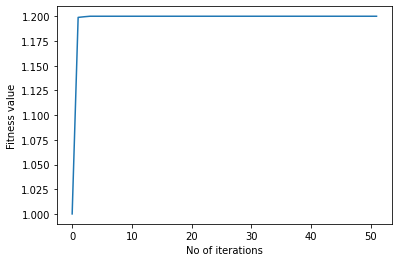

In [55]:
plt.plot(plotse)
plt.xlabel('No of iterations')
plt.ylabel('Fitness value')
plt.show()


In [56]:
mem.to_csv('memory.csv')